In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

import os
import pickle

from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

In [5]:
df = pd.read_csv('clean.csv', encoding='ISO-8859-1').sample(frac=1, random_state=0)

df.head()

,CarName,EngineType,FuelType,MaximumPower,MaximumTorque,Drivetrain,FuelConsumption,Range,FuelTankCapacity,CO2Emissions,TopSpeed,Acceleration
15271,Renault Vel Satis Phase 2 Grand Confort 3.5 V6...,V 6,Petrol,241,330,FWD,11.5,695,80.0,275,235,8.3
22908,Mazda 3 III SportSedan SKYACTIV-G 2.0 120HP Auto,Inline 4,Petrol,120,210,FWD,5.6,910,51.0,128,198,10.3
11277,Renault Megane 1 Phase 2 Coupe 1.6 16V Sport,Inline 4,Petrol,107,148,FWD,6.9,869,60.0,160,198,9.6
2921,Renaultaguna 3 Phase 2 Grand Tour Dynamique To...,Inline 4,Petrol,140,195,FWD,7.6,923,60.0,175,205,9.3
3076,Fiat 500C Pop 0.9 Turbo TinAir 85HP,Inline 2,Petrol,85,145,FWD,4.1,853,35.0,95,173,11.0


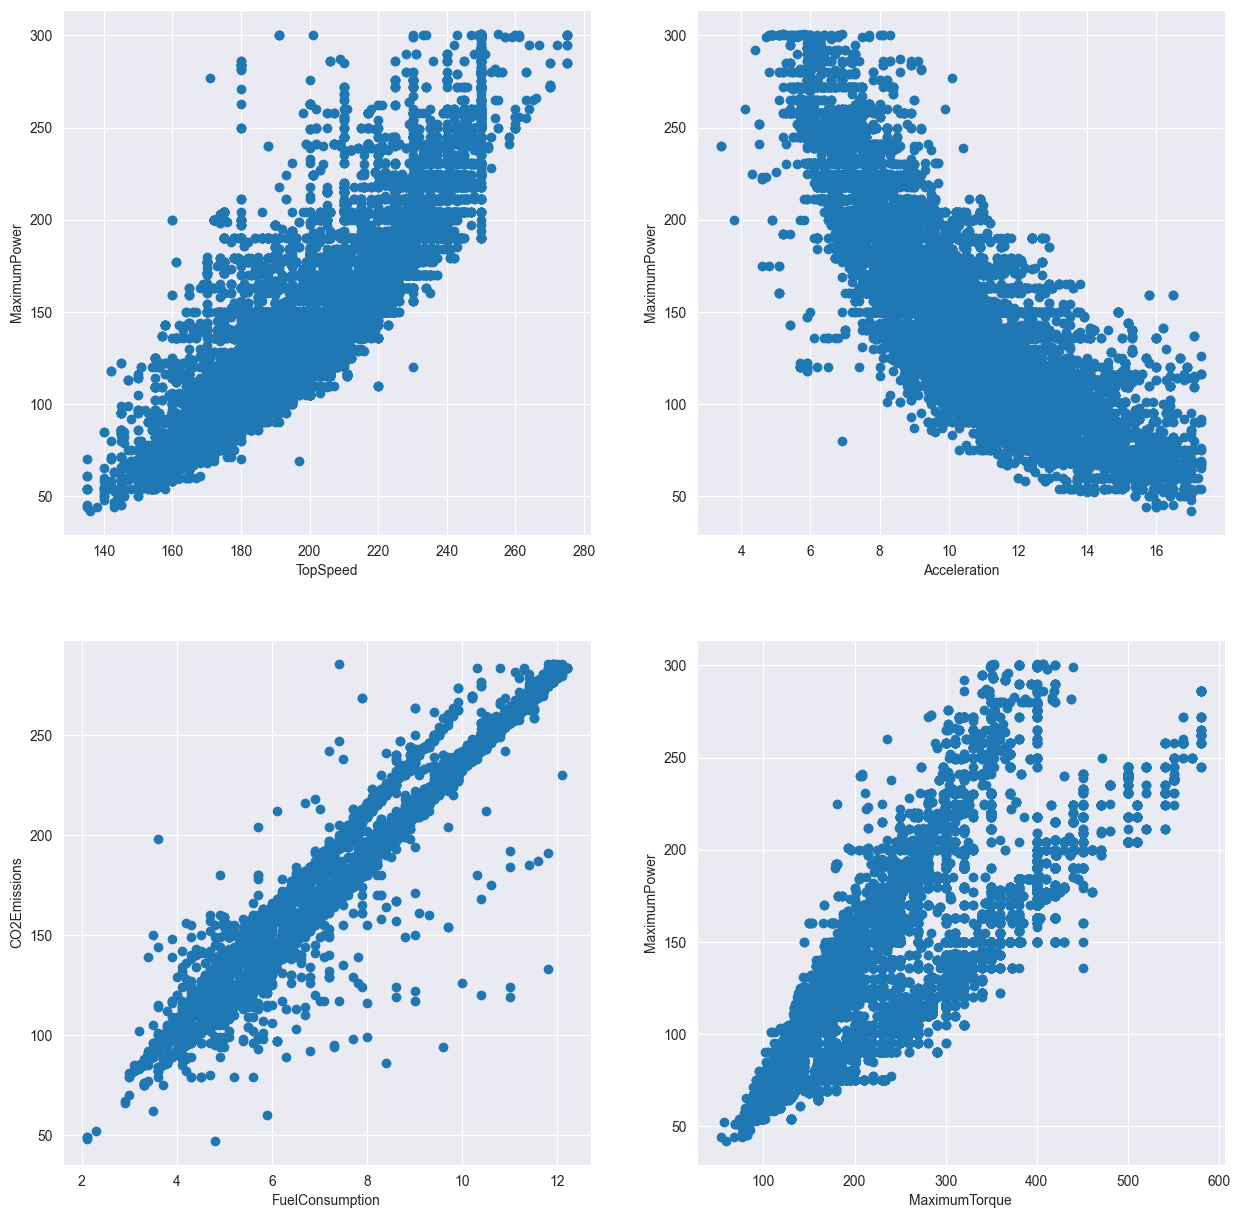

In [6]:
# Массив графиков 2 на 2, размер отображаемой картинки: 15 на 15
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].scatter(df["TopSpeed"], df["MaximumPower"])
ax[0][0].set_xlabel("TopSpeed")
ax[0][0].set_ylabel("MaximumPower")


ax[0][1].scatter(df["Acceleration"], df["MaximumPower"])
ax[0][1].set_xlabel("Acceleration")
ax[0][1].set_ylabel("MaximumPower")


ax[1][0].scatter(df["FuelConsumption"], df["CO2Emissions"])
ax[1][0].set_xlabel("FuelConsumption")
ax[1][0].set_ylabel("CO2Emissions")


ax[1][1].scatter(df["MaximumTorque"], df["MaximumPower"], label="f")
ax[1][1].set_xlabel("MaximumTorque")
ax[1][1].set_ylabel("MaximumPower")
plt.show()

In [7]:
kmeans_params = {
    "n_clusters": [2, 3, 4],
    "n_init": [1]
}

dbscan_params = {
    "eps": [0.005, 0.05, 0.1],
    "min_samples": [2, 3, 6, 8]
}

ierarch_params = {
    "n_clusters": [2, 3, 4],
    "linkage": ["ward", "complete", "average"]
}

Best parameters for KMeans: {'n_clusters': 2, 'n_init': 1}. Score: 0.5296843024260639


Text(0.5, 1.0, 'KMeans')

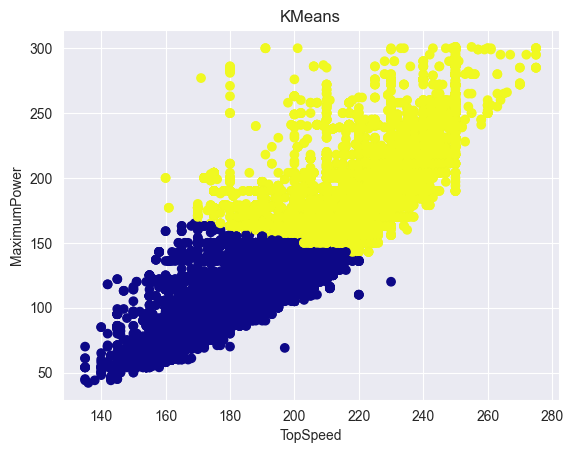

In [8]:
best_score = 0
best_params = None
best_model = None

param_grid = list(ParameterGrid(kmeans_params))

for param in param_grid:
    kmeans = KMeans()
    kmeans.set_params(**param)
    kmeans.fit(df[["TopSpeed", "MaximumPower"]])
    labels = kmeans.labels_
    try:
        score = silhouette_score(df[["TopSpeed", "MaximumPower"]], labels)
    except ValueError:
        print("Error")
        score = -1
    if score > best_score:
        best_score = score
        best_params = param
        best_model = kmeans

print(f"Best parameters for KMeans: {best_params}. Score: {best_score}")

labels = np.unique(best_model.labels_)

plt.scatter(df["TopSpeed"], df["MaximumPower"], c=best_model.labels_, cmap='plasma')
plt.xlabel("TopSpeed")
plt.ylabel("MaximumPower")
plt.title("KMeans")

Best parameters for KMeans: Score: 0.5052745593229143


Text(0.5, 1.0, 'KMeans')

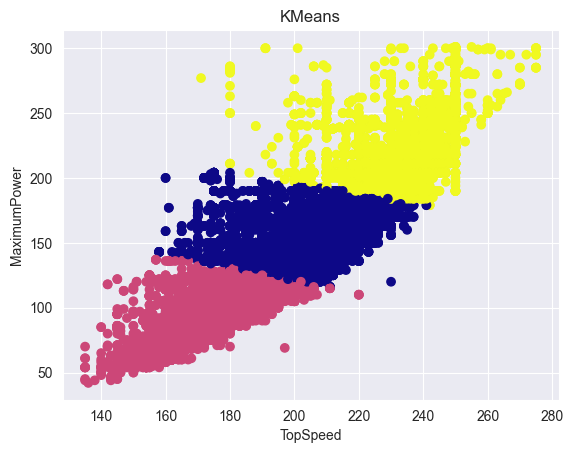

In [9]:
best_score = 0
best_params = None
best_model = None

# Генерируем все комбинации гиперпараметров
param_grid = list(ParameterGrid(kmeans_params))

# Цикл по комбинациям гиперпараметров
kmeans = KMeans(n_clusters=3, n_init=1)

    # Оцениваем модель
    # Используется метрика silhouette_score для оценки качества кластеризации
kmeans.fit(df[["TopSpeed", "MaximumPower"]])
labels = kmeans.labels_
score = silhouette_score(df[["TopSpeed", "MaximumPower"]], labels)


# Выводим лучшие гиперпараметры для текущего алгоритма
print(f"Best parameters for KMeans: Score: {score}")

plt.scatter(df["TopSpeed"], df["MaximumPower"], c=kmeans.labels_, cmap='plasma')  # указываем нашу карту цветов
plt.xlabel("TopSpeed")
plt.ylabel("MaximumPower")
plt.title("KMeans")

C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

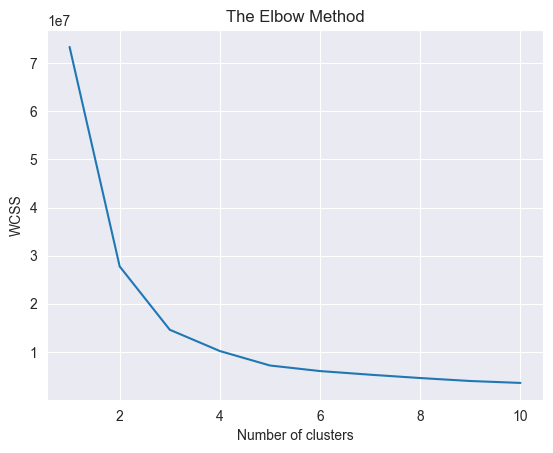

In [10]:
wcss = {}

# Задайте максимальное количество кластеров
max_clusters = 10

# Выполните алгоритм K-means и вычислите WCSS для каждого значения количества кластеров
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["TopSpeed", "MaximumPower"]])
    wcss[k] = kmeans.inertia_

# Постройте график зависимости WCSS от количества кластеров
plt.plot(list(wcss.keys()), list(wcss.values()))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\МашОбуч\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

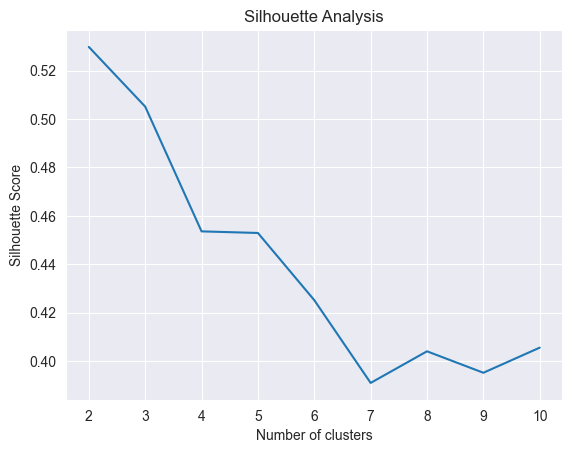

The optimal number of clusters is: 2


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что у вас есть данные, которые вы хотите кластеризовать
# X = [[x1, y1], [x2, y2], ...]

# Задайте диапазон количества кластеров
min_clusters = 2
max_clusters = 10

# Создайте пустой массив для хранения силуэтных коэффициентов
silhouette_scores = []

# Выполните алгоритм K-means и вычислите силуэтные коэффициенты для каждого значения количества кластеров
for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["TopSpeed", "MaximumPower"]])
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df[["TopSpeed", "MaximumPower"]], labels)
    silhouette_scores.append(silhouette_avg)

# Найдите оптимальное количество кластеров с наивысшим силуэтным коэффициентом
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters

# Постройте график силуэтных коэффициентов
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")

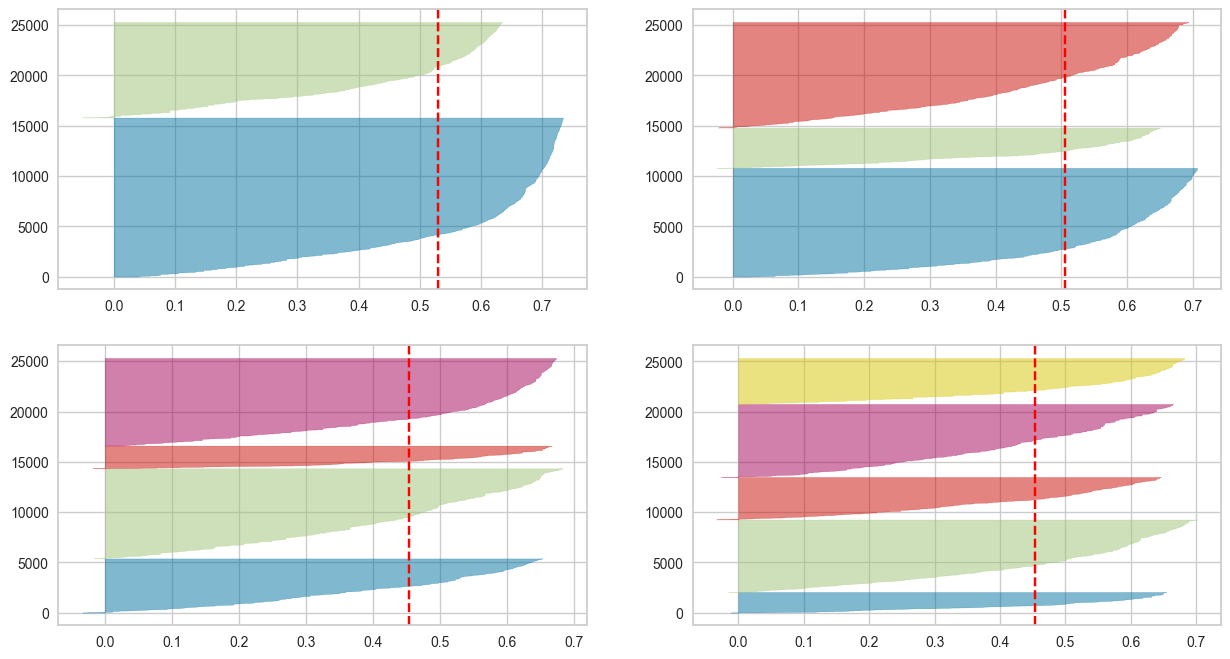

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df[["TopSpeed", "MaximumPower"]])

In [14]:
df_KMeans = df.copy()[["TopSpeed", "MaximumPower"]]
df_KMeans["labels"] = kmeans.labels_
df_KMeans.groupby("labels").mean()

,TopSpeed,MaximumPower
labels,,
0,243.249123,261.700000
1,186.601344,147.338186
2,160.955696,70.027125
3,225.307568,181.723833
4,186.898755,111.673965
5,211.904961,154.545726
6,174.313552,92.762327
7,194.452910,186.070899
8,201.954741,132.329741


Best parameters for ierarch: {'linkage': 'average', 'n_clusters': 2}. Score: 0.5432084467434329


Text(0.5, 1.0, 'Ierarch')

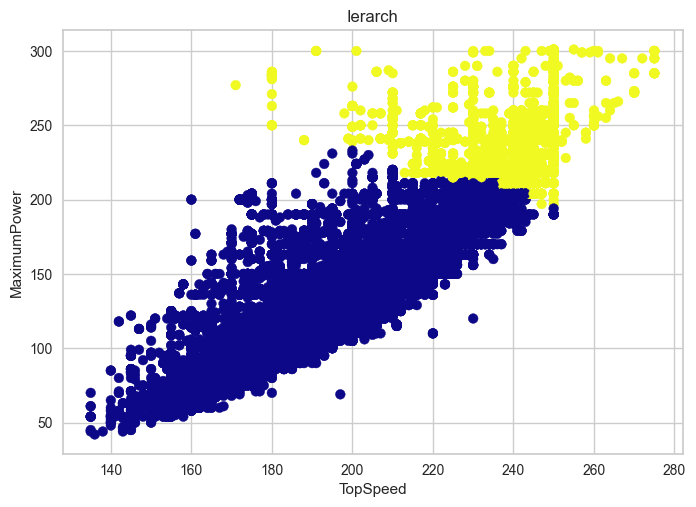

In [15]:
best_score = 0
best_params = None
best_model = None


param_grid = list(ParameterGrid(ierarch_params))

for param in param_grid:
    ierarch = AgglomerativeClustering()

    ierarch.set_params(**param)

    ierarch.fit(df[["TopSpeed", "MaximumPower"]])
    labels = ierarch.labels_
    try:
        score = silhouette_score(df[["TopSpeed", "MaximumPower"]], labels)
    except ValueError:
        print("Error")
        score = -1

    if score > best_score:
        best_score = score
        best_params = param
        best_model = ierarch
        
# Выводим лучшие гиперпараметры для текущего алгоритма
print(f"Best parameters for ierarch: {best_params}. Score: {best_score}")


plt.scatter(df["TopSpeed"], df["MaximumPower"], c=best_model.labels_, cmap='plasma')
plt.xlabel("TopSpeed")
plt.ylabel("MaximumPower")
plt.title("Ierarch")

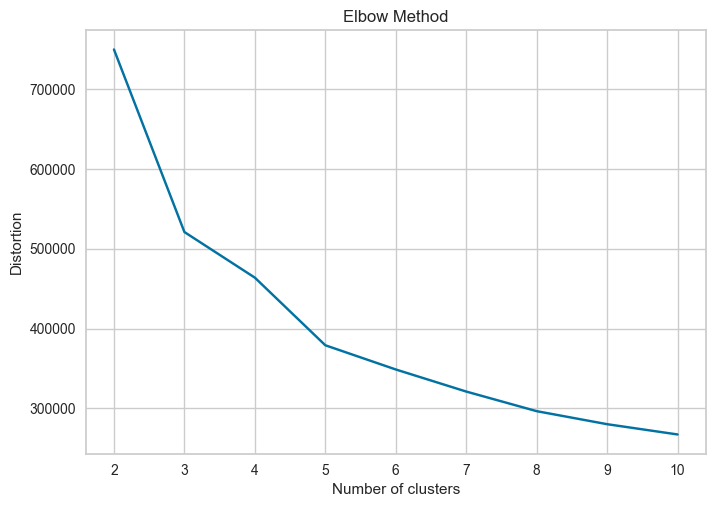

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что у вас есть данные, которые вы хотите кластеризовать
# X = [[x1, y1], [x2, y2], ...]

# Задайте диапазон количества кластеров
min_clusters = 2
max_clusters = 10

# Создайте пустой массив для хранения сумм расстояний
distortion = []

# Выполните Agglomerative Clustering и вычислите суммы расстояний для каждого значения количества кластеров
for k in range(min_clusters, max_clusters + 1):
    clustering = AgglomerativeClustering(n_clusters=k)
    labels = clustering.fit_predict(df[["TopSpeed", "MaximumPower"]])
    cluster_centers = np.array([df[["TopSpeed", "MaximumPower"]][labels == i].mean(axis=0) for i in range(k)])
    distances = pairwise_distances_argmin_min(df[["TopSpeed", "MaximumPower"]], cluster_centers)[1]
    distortion.append(distances.sum())

# Постройте график сумм расстояний
plt.plot(range(min_clusters, max_clusters + 1), distortion)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [18]:
df_ierarch= df.copy()[["TopSpeed", "MaximumPower"]]
df_ierarch["labels"] = ierarch.labels_
df_ierarch.groupby("labels").mean()

,TopSpeed,MaximumPower
labels,,
0,207.861853,158.312475
1,240.130415,242.723666
2,177.615748,96.945431
3,193.812500,281.000000


0.9360450222180597
0.858128053149558
0.655832469959942
0.5315564822768697
0.9360450222180597
0.858128053149558
0.655832469959942
0.5315564822768697
0.9360450222180597
0.858128053149558
0.655832469959942
0.5315564822768697
Best parameters for DBscan: {'eps': 0.005, 'min_samples': 2}. Score: 0.9360450222180597


Text(0.5, 1.0, 'DBScan')

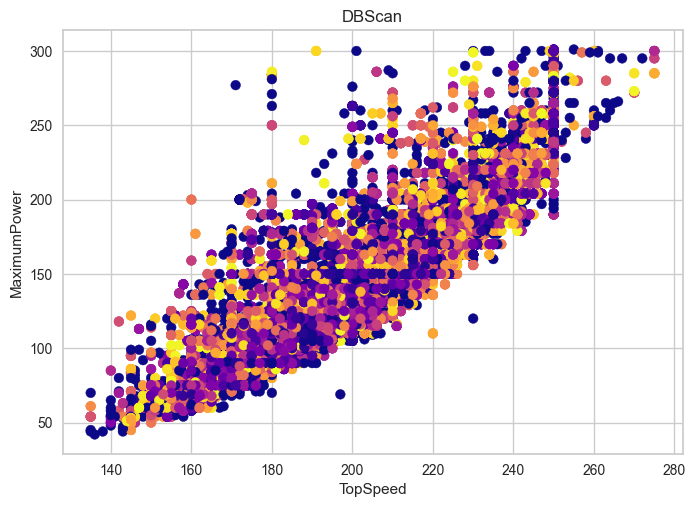

In [19]:
best_score = -1
best_params = None
best_model = None

param_grid = list(ParameterGrid(dbscan_params))

for param in param_grid:
    dbscan = DBSCAN()
    dbscan.set_params(**param)

    dbscan.fit(df[["TopSpeed", "MaximumPower"]])
    labels = dbscan.labels_
    try:
        score = silhouette_score(df[["TopSpeed", "MaximumPower"]], labels)
        print(score)
    except ValueError:
        print("Error")
        score = -1

    if score > best_score:
        best_score = abs(score)
        best_params = param
        best_model = dbscan

# Выводим лучшие гиперпараметры для текущего алгоритма
print(f"Best parameters for DBscan: {best_params}. Score: {best_score}")


labels = np.unique(best_model.labels_)  # получаем список уникальных меток
# colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))    # создаем массив цветов
plt.scatter(df["TopSpeed"], df["MaximumPower"], c=best_model.labels_, cmap='plasma')  # указываем нашу карту цветов
# Создаем легенду в виде списка с данными о маркерах, цветах и метках
# handle_list = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]
# plt.legend(handle_list, labels, title='Classes')
plt.xlabel("TopSpeed")
plt.ylabel("MaximumPower")
plt.title("DBScan")

In [20]:
df_DBSCAN = df.copy()[["TopSpeed", "MaximumPower"]]
df_DBSCAN["labels"] = dbscan.labels_
df_DBSCAN.groupby("labels").mean()

,TopSpeed,MaximumPower
labels,,
-1,198.258048,151.324262
0,235.000000,241.000000
1,198.000000,120.000000
2,205.000000,140.000000
3,173.000000,85.000000
...,...,...
846,244.000000,220.000000
847,226.000000,160.000000
848,240.000000,184.000000
